### Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the Airlines data and identify the number of clusters formed and draw inferences.


In [31]:
#Importing libraries 
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot as plt
import seaborn as sns

In [32]:
#Reading data
data = pd.read_csv("EastWestAirlines.csv")
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


### EDA

In [34]:
data1 = data.rename({'ID#':'Id'},axis=1)

In [35]:
data1

,Id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [36]:
#normalising the data
def norm_func(i):
  x = (i-i.min())/(i.max()-i.min())
  return(x)

In [37]:
data_n = norm_func(data1)
data_n

,Id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.000000,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.000249,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.000498,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.000746,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.000995,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.999005,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.999254,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.999502,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.999751,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data1.iloc[:,1:])

In [39]:
scaled_data

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

# **HIERARCHICAL CLUSTERING**

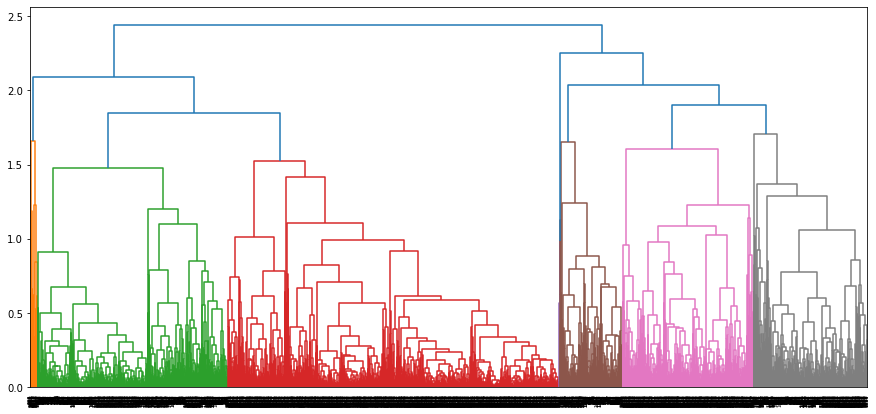

In [44]:
#creating dendrogram
plt.figure(figsize =(15,7))
dendrograms = sch.dendrogram(sch.linkage(data_n,'complete'))

In [45]:
#creating clusters
hc = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='complete')
hc

AgglomerativeClustering(linkage='complete', n_clusters=5)

In [46]:
y_hc = hc.fit_predict(data_n)
y_hc

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [47]:
data_n['h_clusterid']= hc.labels_
data_n

,Id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,0.000000,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,1
1,0.000249,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,1
2,0.000498,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,1
3,0.000746,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,1
4,0.000995,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.999005,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0,0
3995,0.999254,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0,0
3996,0.999502,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0,0
3997,0.999751,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0,1


# **KMEANS**

In [48]:
from sklearn.cluster import KMeans

<function matplotlib.pyplot.show(close=None, block=None)>

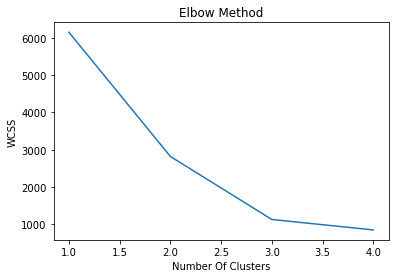

In [49]:
wcss=[]
for i in range(1,5):
    kmeans= KMeans(n_clusters=i, random_state=0)
    kmeans.fit(data_n)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,5),wcss)
plt.title('Elbow Method')
plt.xlabel('Number Of Clusters')
plt.ylabel('WCSS')
plt.show

In [50]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(data_n)

KMeans(n_clusters=4, random_state=42)

In [51]:
clusters_new.labels_

array([3, 3, 3, ..., 2, 0, 0])

In [52]:
data['clusterid_new']= clusters_new.labels_

In [53]:
clusters_new.cluster_centers_

array([[ 7.82166719e-01,  2.50652671e-02,  8.91288778e-03,
         1.09119252e-01,  3.89711613e-04,  1.55884645e-03,
         2.72641113e-02,  9.32951476e-02,  8.79061018e-03,
         1.40443242e-02,  2.54945165e-01,  2.33826968e-03,
         1.00233827e+00],
       [ 2.07420107e-01,  6.69512558e-02,  3.97229846e-02,
         9.23423423e-02,  7.50750751e-02,  1.50150150e-03,
         4.13823916e-02,  1.39185697e-01,  2.83183856e-02,
         5.33174684e-02,  7.51729062e-01,  9.24924925e-01,
         3.89489489e+00],
       [ 5.00813937e-01,  5.33308227e-02,  1.58747552e-02,
         4.98716852e-01,  2.99401198e-03,  5.34644996e-03,
         1.27169769e-01,  1.93526568e-01,  2.50732039e-02,
         4.40143971e-02,  5.00255474e-01,  1.00000000e+00,
        -9.99200722e-16],
       [ 2.84396387e-01,  4.60030762e-02,  6.98191888e-03,
         2.51647446e-01, -2.77555756e-17,  2.88303130e-03,
         5.15601727e-02,  1.21259722e-01,  7.97418721e-03,
         1.35214945e-02,  6.77597867e

In [55]:
data.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,3144.384735,42742.718847,99.283489,1.436137,1.000779,1.006231,7186.035826,8.028037,270.961838,0.744548,2117.904206,0.002336
1,1,834.828829,114141.045045,442.831832,1.369369,1.150150,1.006006,10911.915916,11.969970,872.687688,2.825826,6236.840841,0.924925
2,2,2014.272027,90920.413174,176.971771,2.994867,1.005988,1.021386,33532.760479,16.643285,772.680924,2.332763,4151.118905,1.000000
3,3,1143.603462,78446.106348,77.898599,2.007420,1.000000,1.011542,13604.208574,10.425392,245.654575,0.716406,5623.416323,0.000824


In [20]:
data1

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new
0,1,28143,0,1,1,1,174,1,0,0,7000,0,3
1,2,19244,0,1,1,1,215,2,0,0,6968,0,3
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,3
3,4,14776,0,1,1,1,500,1,0,0,6952,0,3
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [21]:
data[data['clusterid_new']==2]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,2
11,12,96522,0,5,1,1,61105,19,0,0,6924,1,2
15,16,28495,0,4,1,1,49442,15,0,0,6912,1,2
16,17,51890,0,4,1,1,48963,16,0,0,6910,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3987,4010,11933,0,1,1,1,249,3,79,1,1412,1,2
3989,4012,2622,0,1,1,1,1625,6,0,0,1404,1,2
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,2


# **DBSCAN**

In [22]:
from sklearn.cluster import DBSCAN

In [23]:
data2 = pd.read_excel('/content/EastWestAirlines (2).xlsx', sheet_name = 'data')
print(data2.head())

   ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26               2077                4               6935       1  


In [24]:
print(data2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB
None


In [25]:
data2 = data2.rename({'ID#':'Id','Award?':'Award'},axis=1)

In [26]:
data2

,Id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
array = data2.values
array

array([[    1, 28143,     0, ...,     0,  7000,     0],
       [    2, 19244,     0, ...,     0,  6968,     0],
       [    3, 41354,     0, ...,     0,  7034,     0],
       ...,
       [ 4019, 73597,     0, ...,     0,  1402,     1],
       [ 4020, 54899,     0, ...,     1,  1401,     0],
       [ 4021,  3016,     0, ...,     0,  1398,     0]])

In [29]:
# Scaling the data so that all the features become comparable
scaler = StandardScaler().fit(array)
X = scaler.transform(array)

In [30]:
X

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [31]:
dbscan = DBSCAN(eps=2.5, min_samples= 6)
dbscan.fit(X)

DBSCAN(eps=2.5, min_samples=6)

In [32]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [33]:
cl = pd.DataFrame(dbscan.labels_ , columns =['cluster'])
cl

,cluster
0,0
1,0
2,0
3,0
4,0
...,...
3994,0
3995,0
3996,0
3997,0


In [34]:
clustered= pd.concat([data2,cl],axis=1)

In [35]:
clustered[clustered['cluster']==-1]

,Id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cluster
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,-1
50,51,108137,0,1,1,1,6368,5,6368,5,6844,0,-1
65,66,53914,0,3,1,1,33767,45,5550,29,6826,1,-1
106,109,96627,1182,1,1,3,49059,26,2300,9,6738,1,-1
117,120,969559,0,1,1,1,2500,3,1000,2,7718,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3846,3869,97510,1678,5,1,1,71609,51,7650,26,1665,1,-1
3883,3906,126167,0,5,1,1,190160,15,0,0,1612,1,-1
3911,3934,55922,2273,1,1,1,8104,19,4104,16,1552,0,-1
3917,3940,130748,0,4,1,1,65510,37,6349,7,1545,0,-1


In [36]:
clustered

,Id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [37]:
clustered.mean()

Id                    2014.819455
Balance              73601.327582
Qual_miles             144.114529
cc1_miles                2.059515
cc2_miles                1.014504
cc3_miles                1.012253
Bonus_miles          17144.846212
Bonus_trans             11.601900
Flight_miles_12mo      460.055764
Flight_trans_12          1.373593
Days_since_enroll     4118.559390
Award                    0.370343
cluster                 -0.019755
dtype: float64

# **K-MEANS ++**

In [38]:
#loading libraries
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.cluster import kmeans_plusplus

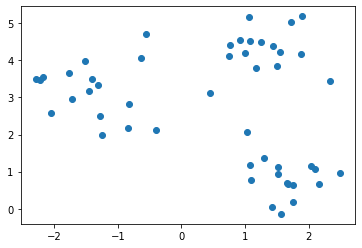

In [39]:
#creating blobs
X, y = make_blobs(n_samples=49, centers=3, cluster_std=0.60, random_state=0)
plt.scatter(X[:,0], X[:,1])

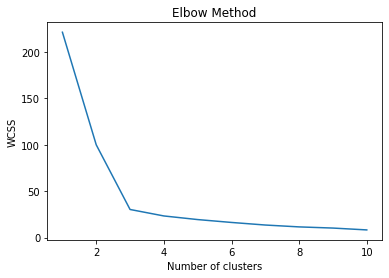

In [40]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

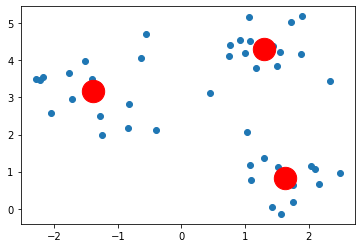

In [41]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=500, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=500, c='red')
plt.show()

# **KMEDOIDS**

In [42]:
!pip install scikit-learn-extra

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 5.2 MB/s 


In [43]:
from sklearn_extra.cluster import KMedoids
import matplotlib.pyplot as plt


In [51]:
kmedoids = KMedoids(n_clusters=3).fit(X)

In [52]:
labels = kmedoids.labels_
labels

array([1, 0, 0, 1, 2, 1, 2, 1, 1, 2, 0, 0, 0, 2, 1, 2, 2, 2, 0, 0, 0, 1,
       2, 1, 2, 1, 2, 0, 1, 2, 0, 1, 1, 2, 0, 0, 2, 0, 1, 1, 2, 1, 0, 2,
       0, 0, 1, 0, 2])

In [53]:
centres = kmedoids.cluster_centers_
centres

array([[-1.45075676,  3.15907588],
       [ 1.67467427,  0.68001896],
       [ 1.24258802,  4.50399192]])

In [54]:
class_member_mask = labels

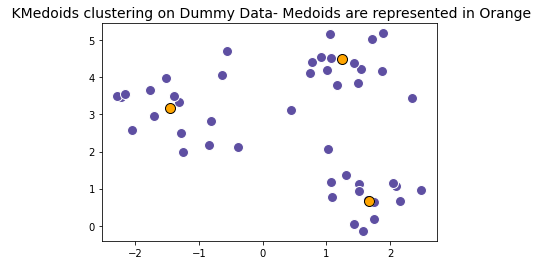

In [59]:
unq_lab = set(labels)
#Setting Up Color Codes
colors_plot = [
 plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unq_lab))
]
for k, col in zip(unq_lab, colors_plot):
  labels == k

xy = X
 
 #Plotting Feature X and Feature Y for each cluster labels
 
plt.plot(
 xy[:, 0],
 xy[:, 1],
 "o",
 markerfacecolor=tuple(col),
 markeredgecolor= "white",
 markersize=10,
);

#Annotate Centroids
plt.plot(
 kmedoids.cluster_centers_[:, 0],
 kmedoids.cluster_centers_[:, 1],
 'o',
 markerfacecolor= "orange",
 markeredgecolor= "k",
 markersize=10,
);

#Add title to the plot

plt.title(" KMedoids clustering on Dummy Data- Medoids are represented in Orange", fontsize=14);